#Kaggle Setup — Download Dataset

In [2]:
# STEP 1: Upload your Kaggle API token file (kaggle.json)
# You can get it from: https://www.kaggle.com/account > API > Create New API Token
from google.colab import files
files.upload()  # Select kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ravitejabhagavatula","key":"aff123f26fc601f893baad0210412456"}'}

In [3]:
# STEP 2: Set up the Kaggle environment and download the dataset
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the fruits image dataset from Kaggle
!kaggle datasets download -d shreyapmaher/fruits-dataset-images

# Unzip it to a folder named 'fruits_dataset'
!unzip -q fruits-dataset-images.zip -d fruits_dataset


Dataset URL: https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images
License(s): other
 98% 200M/205M [00:00<00:00, 651MB/s] 
100% 205M/205M [00:00<00:00, 652MB/s]


#Load & Preprocess the Dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [6]:
# Set image size and batch size
img_size = (128, 128)
batch_size = 32

In [10]:
data_dir = 'fruits_dataset/images'

In [11]:
# STEP 3: Use ImageDataGenerator to:
# - Rescale pixels to [0,1]
# - Apply basic augmentations
# - Split data into training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # normalize pixel values
    shear_range=0.2,        # random shear
    zoom_range=0.2,         # random zoom
    horizontal_flip=True,   # flip images
    validation_split=0.2    # use 20% for validation
)


In [12]:
# Create generators from directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 288 images belonging to 9 classes.


In [13]:
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 71 images belonging to 9 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_size + (3,)),  # First Conv layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # First Pooling layer

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Second Pooling layer

    tf.keras.layers.Flatten(),  # Flatten into 1D
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model with:
# - Adam optimizer
# - Categorical crossentropy (since it's multi-class)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
# Print model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,481 (28.20 MB)

 Trainable params: 7,393,481 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# STEP 5: Train the CNN using the training and validation generators
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.1300 - loss: 3.6123 - val_accuracy: 0.1690 - val_loss: 2.1290
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.2190 - loss: 2.1104 - val_accuracy: 0.2817 - val_loss: 1.9893
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2939 - loss: 1.9514 - val_accuracy: 0.3521 - val_loss: 1.7001
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4334 - loss: 1.5811 - val_accuracy: 0.4789 - val_loss: 1.4440
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5470 - loss: 1.2895 - val_accuracy: 0.5915 - val_loss: 1.3344
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5767 - loss: 1.1892 - val_accuracy: 0.6056 - val_loss: 1.1433
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6424 - loss: 1.0539 - val_accuracy: 0.6901 - val_loss: 1.0109
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7004 - loss: 0.9308 - val_accuracy: 0.6056 - val_loss: 1.1254
Epoch 9/

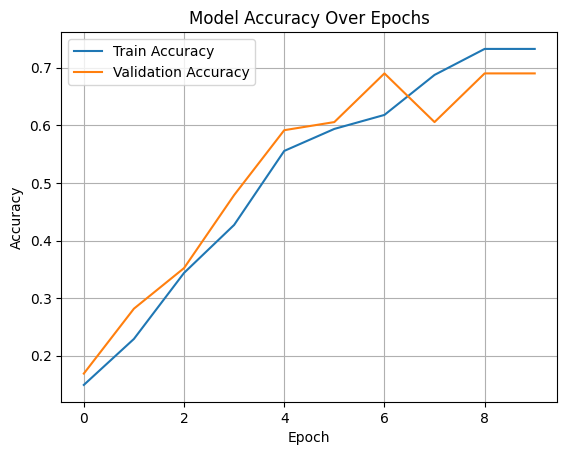

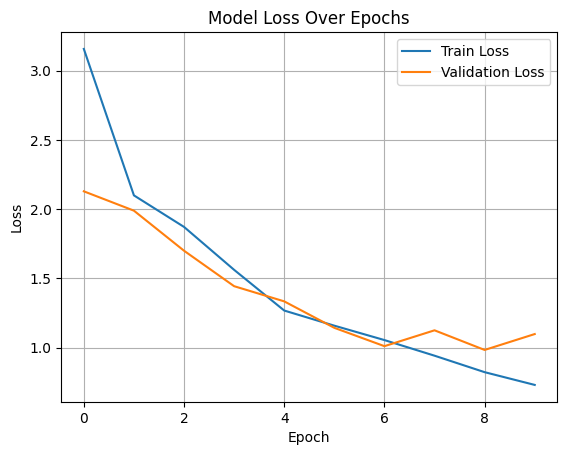

In [18]:
# STEP 6: Plot accuracy and loss to visualize training performance
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [22]:
# STEP 7: Predict on a new image from the dataset
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image
img_path = '/content/fruits_dataset/Apple.jpg'  # change to any image path
img = image.load_img(img_path, target_size=img_size)

# Preprocess image
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]

print(f"Predicted Fruit: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Fruit: apple fruit
